# DATA VISUALIZATION COURSE PROJECT 2024-25

###Year: **SY**
###Division: **CSE AI B**
###Batch: **2**
###Group: **8**

###**Members:**
###33  12310543  SHREY RUPNAVAR
###37  12310120  ATHARVA SALITRI
###60  12310237  TANISHQ THUSE
###61  12311279  TRIPTI MIRANI

**Problem Statement:**
**Parkinson's disease (PD)** is a neurodegenerative disorder that affects millions of people worldwide. Early and accurate diagnosis of Parkinson's disease is crucial for effective management and treatment. Traditional diagnostic methods often rely on clinical evaluations, which can be subjective and may not detect early-stage PD.

**Machine learning (ML)** offers a potential solution by analyzing patterns in vocal measurements to distinguish between healthy individuals and those with Parkinson's disease. The Oxford Parkinson's Disease Detection Dataset provides a range of vocal features that can be used to train various ML algorithms for this purpose.

**Dataset:** https://archive.ics.uci.edu/dataset/174/parkinsons

###**Attribute Information:**

###**Matrix column entries (attributes):**

**name** - ASCII subject name and recording number

**MDVP:Fo(Hz)** - Average vocal fundamental frequency

**MDVP:Fhi(Hz)** - Maximum vocal fundamental frequency

**MDVP:Flo(Hz)** - Minimum vocal fundamental frequency

**MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP** - Several measures of variation in fundamental frequency

**MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA** - Several measures of variation in amplitude

**NHR, HNR** - Two measures of the ratio of noise to tonal components in the voice

**status** - The health status of the subject (one) - Parkinson's, (zero) - healthy

**RPDE, D2** - Two nonlinear dynamical complexity measures

**DFA** - Signal fractal scaling exponent

**spread1,spread2,PPE** - Three nonlinear measures of fundamental frequency variation

In [ ]:
#Import necessary libraries

import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")


In [ ]:
!pip install plotly

In [ ]:
from plotly.offline import iplot
import plotly as py

In [ ]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 25)
pd.set_option('display.width', 400)

In [ ]:
df = pd.read_csv('parkinsons.data')

In [ ]:
print(df)

               name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1   spread2        D2       PPE
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784          0.000070   0.00370   0.00554     0.01109       0.04374             0.426       0.02182       0.03130   0.02971      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031  0.266482  2.301442  0.284654
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968          0.000080   0.00465   0.00696     0.01394       0.06134             0.626       0.03134       0.04518   0.04368      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192  0.335590  2.486855  0.368674
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050          0.000090   0.00544   0.00781 

In [ ]:
df.shape

(195, 24)

In [ ]:
# Handling Null Values

df.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [ ]:
df.dtypes

,0
name,object
MDVP:Fo(Hz),float64
MDVP:Fhi(Hz),float64
MDVP:Flo(Hz),float64
MDVP:Jitter(%),float64
MDVP:Jitter(Abs),float64
MDVP:RAP,float64
MDVP:PPQ,float64
Jitter:DDP,float64
MDVP:Shimmer,float64


In [ ]:
df['status'].value_counts()

,count
status,
1,147
0,48


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

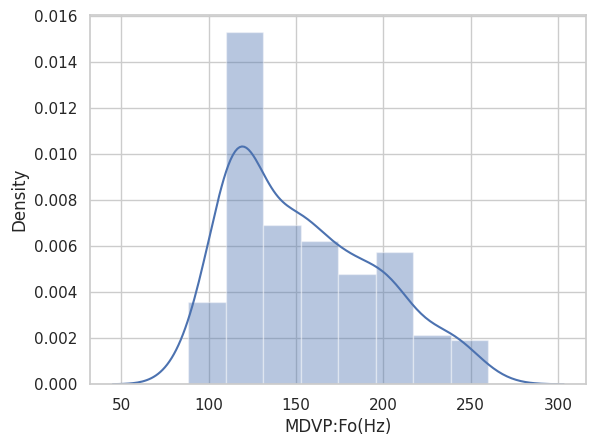

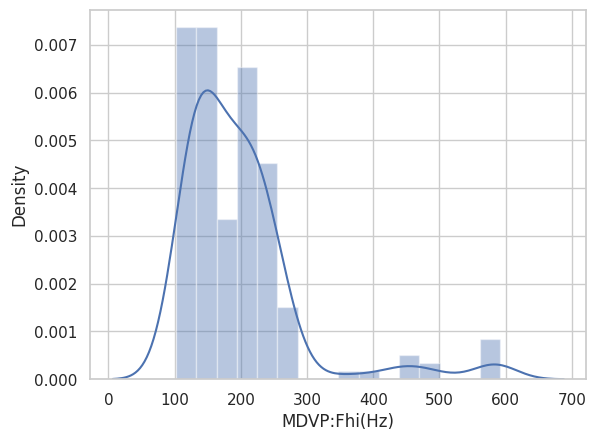

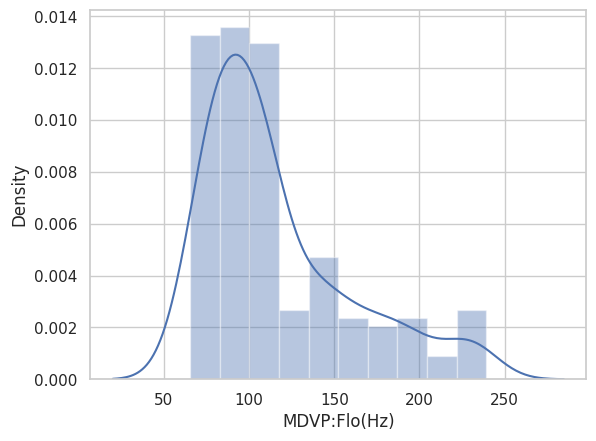

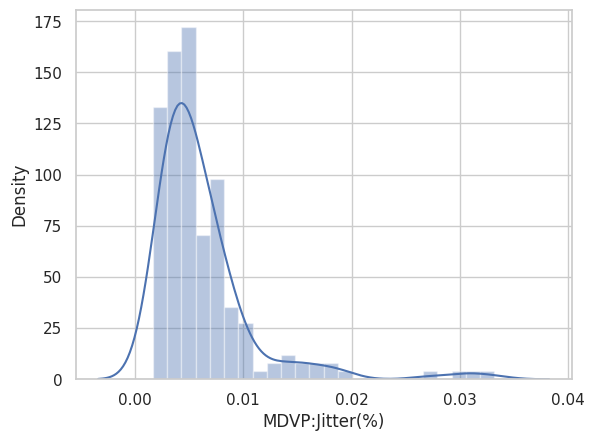

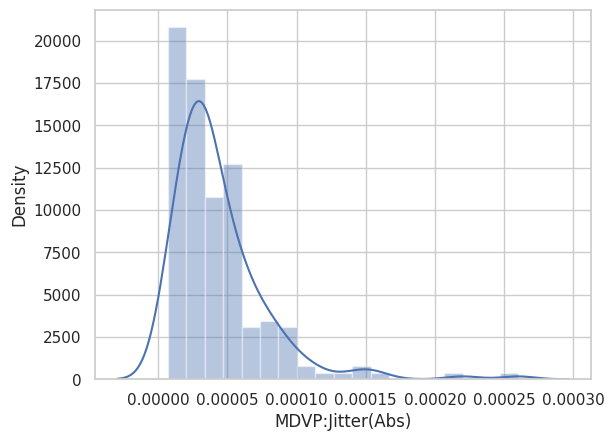

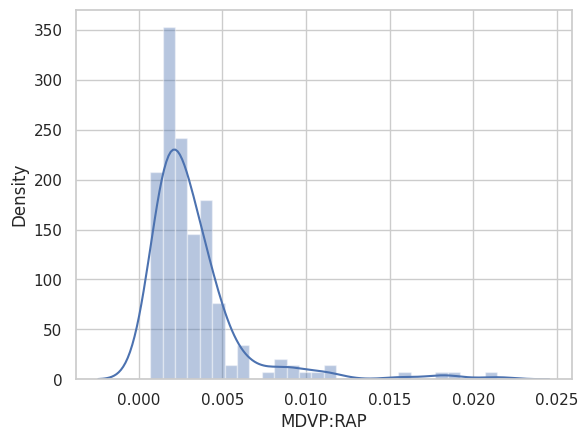

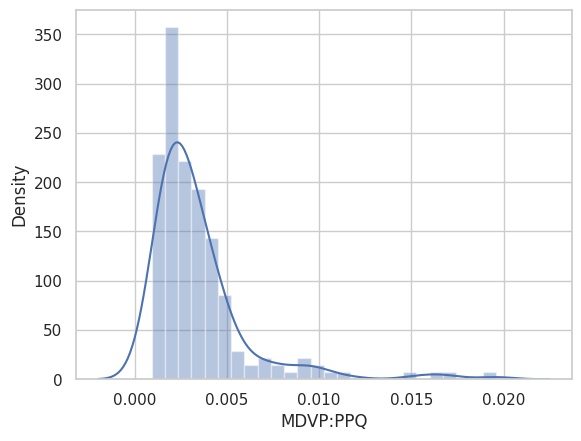

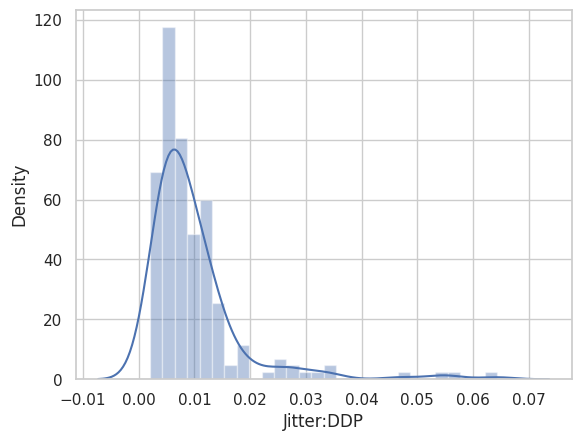

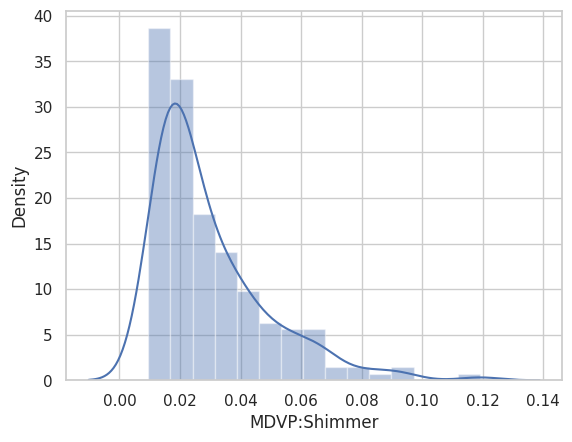

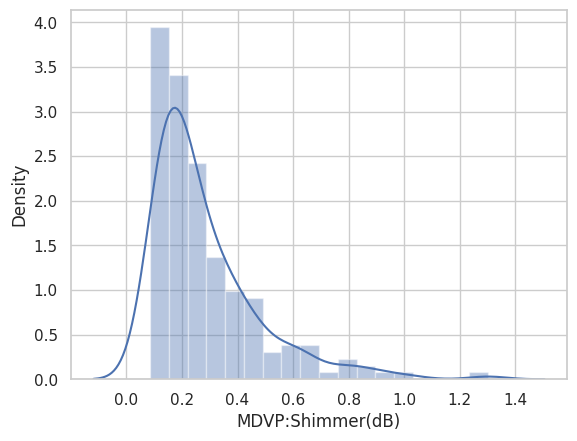

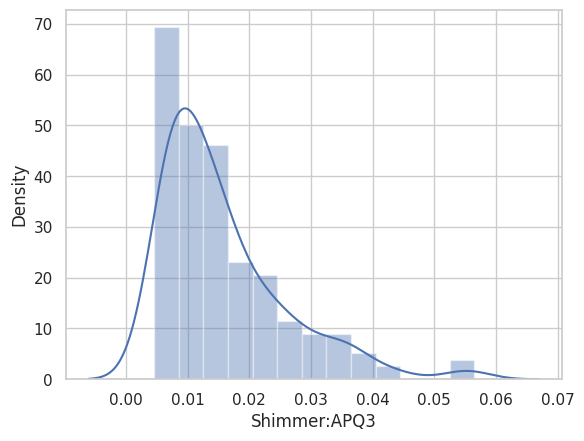

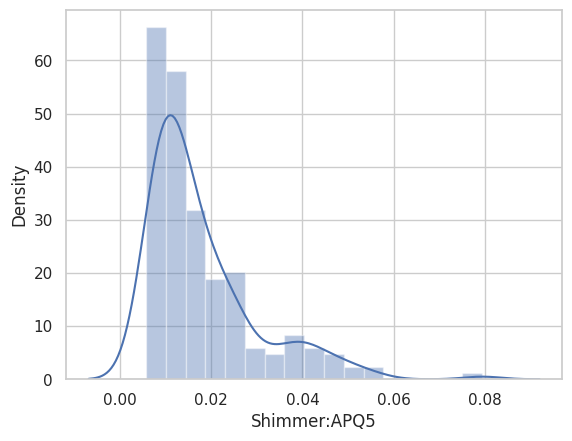

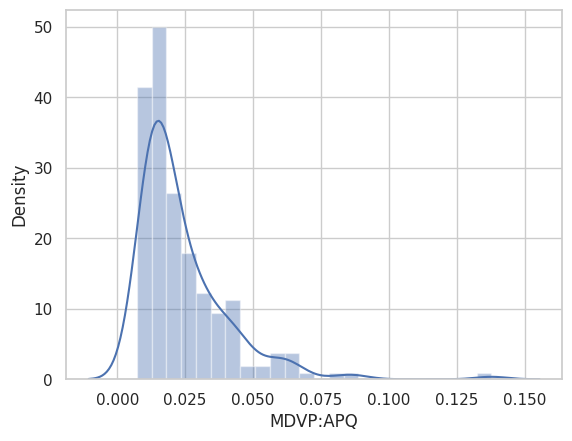

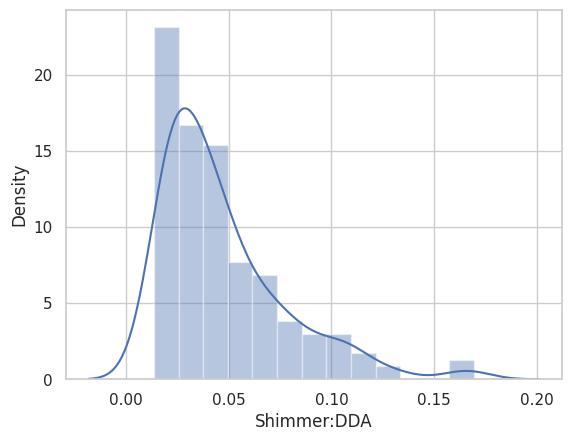

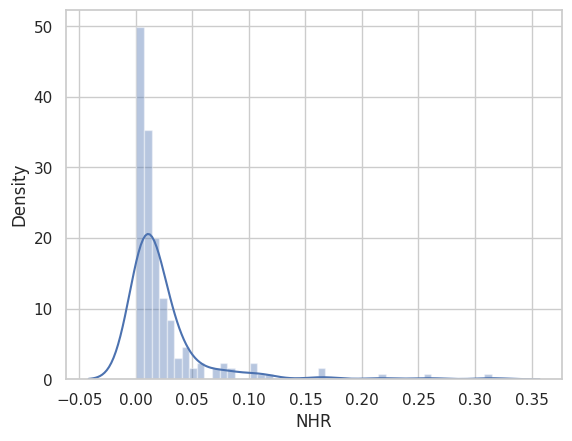

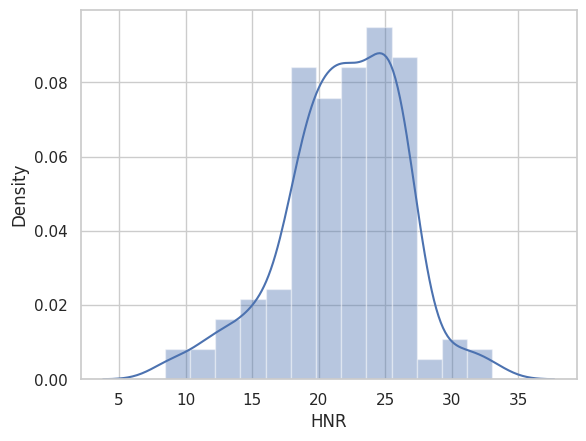

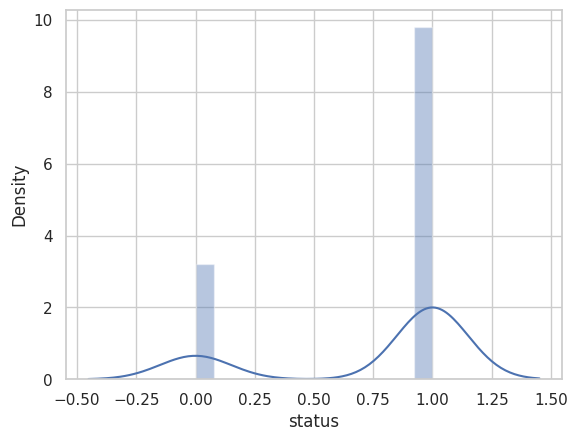

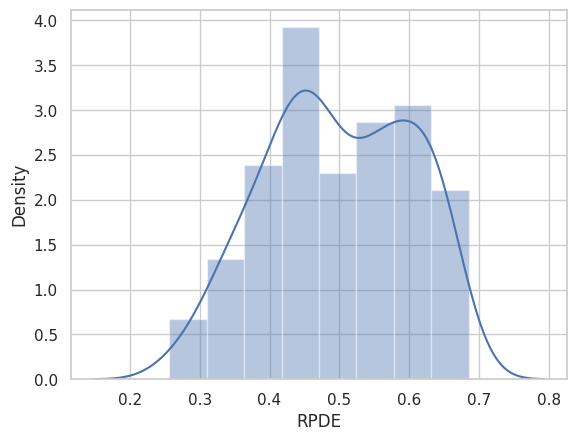

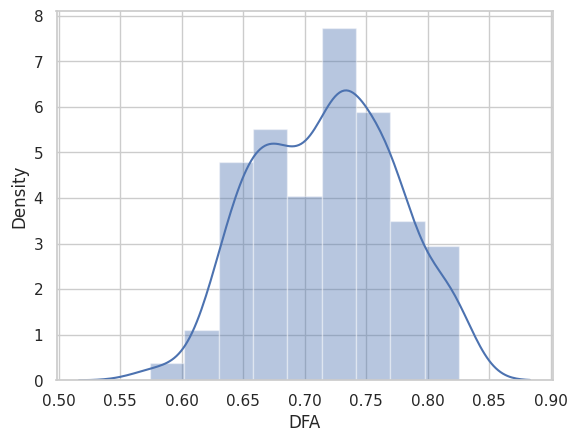

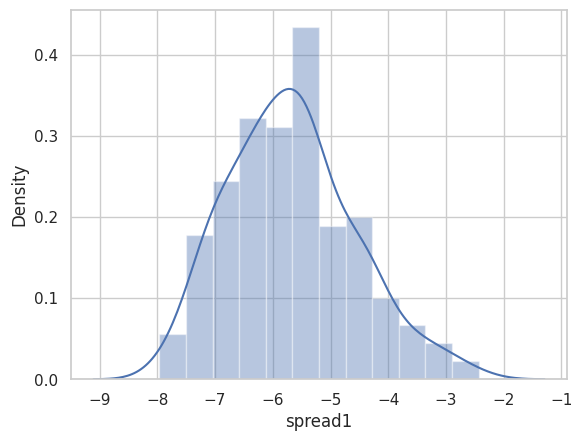

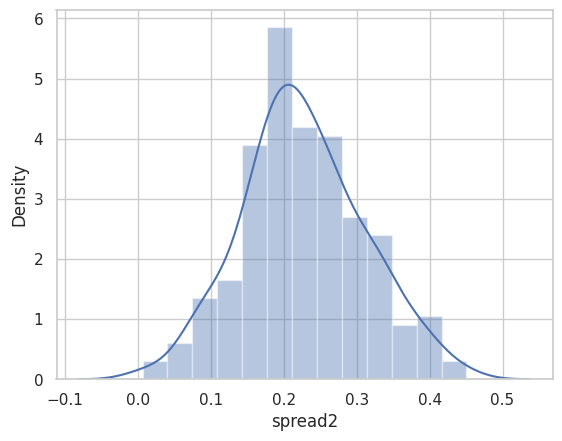

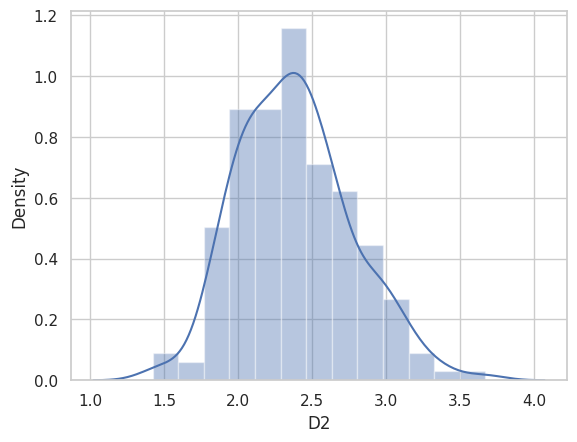

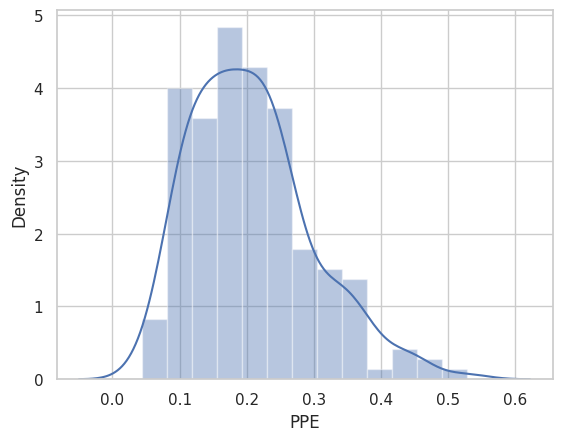

In [ ]:
# Distribution of data

def distplot(col):
  sns.distplot(df[col])
  plt.show()

for i in list(df.columns)[1:]:
  distplot(i)



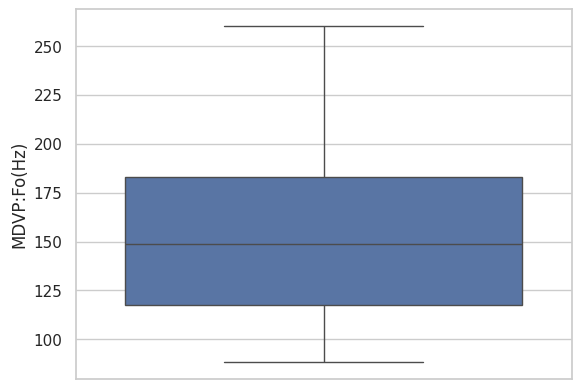

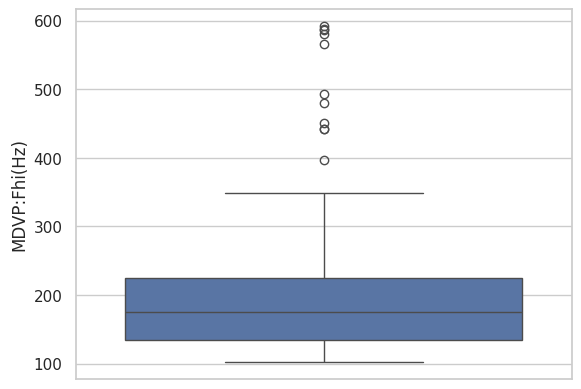

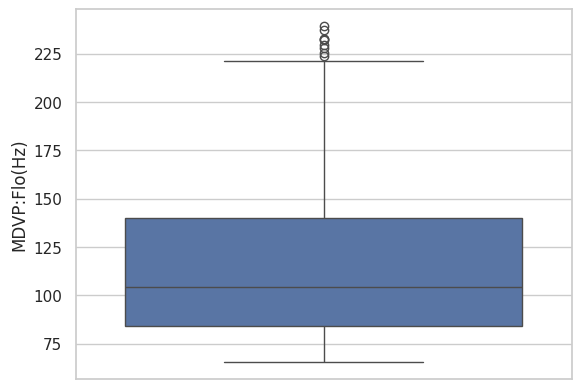

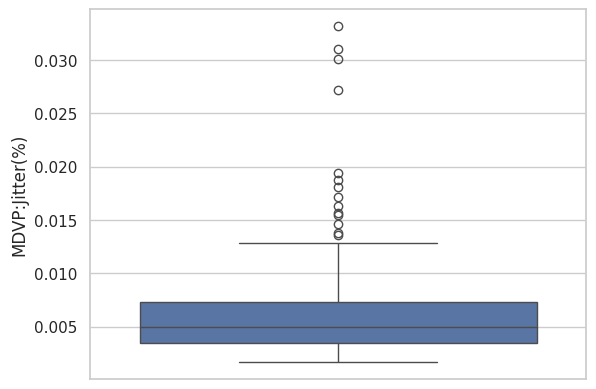

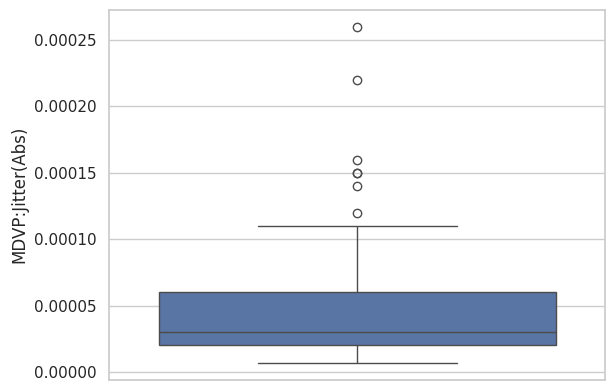

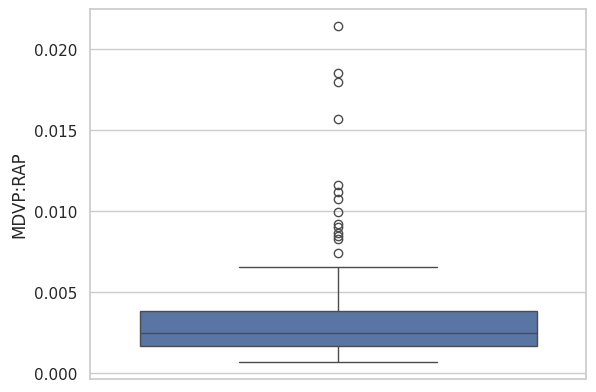

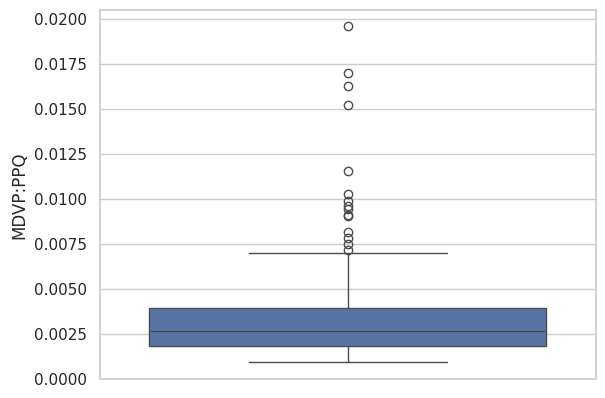

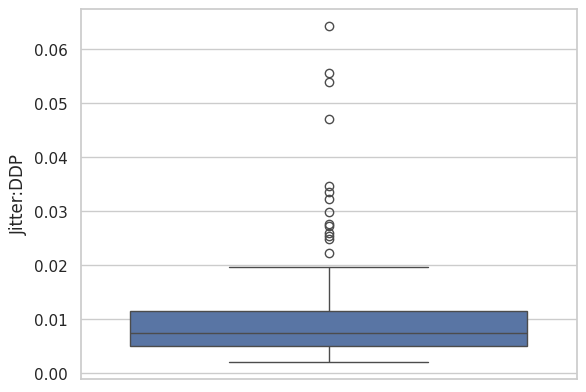

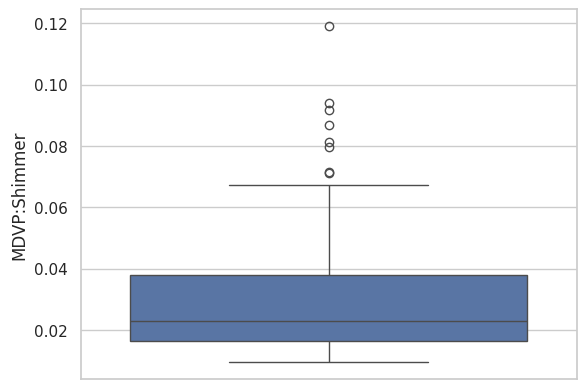

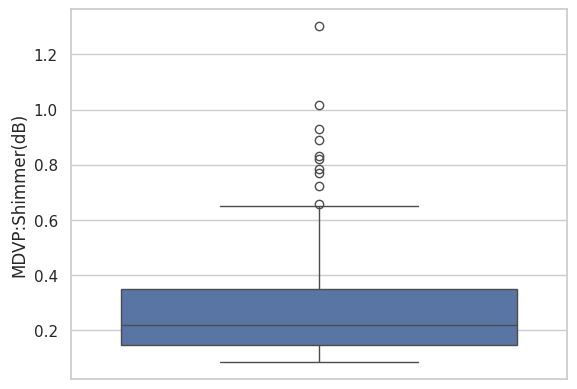

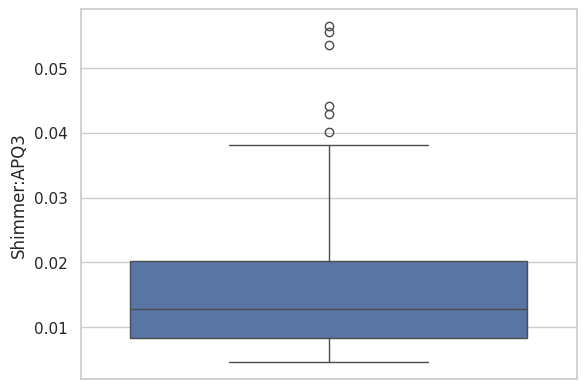

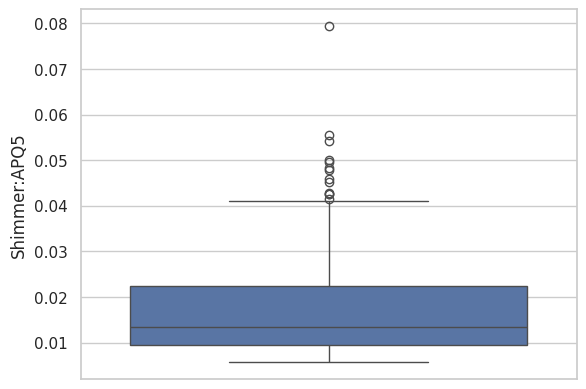

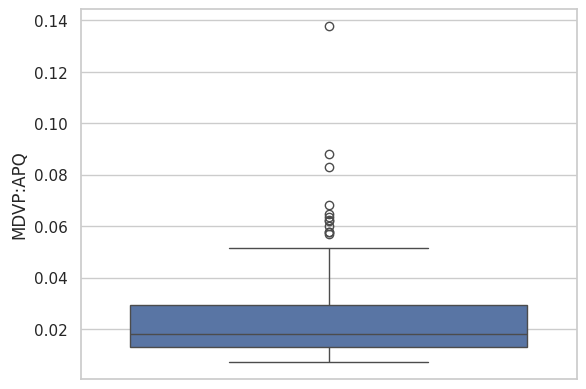

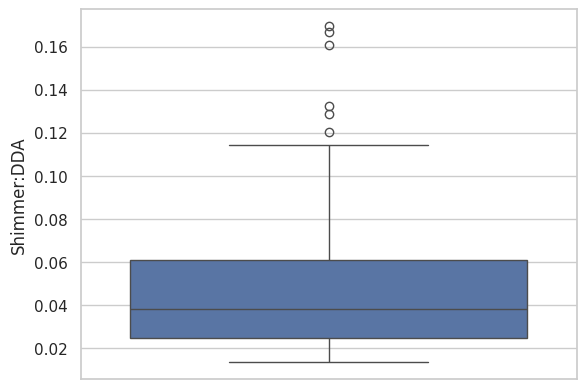

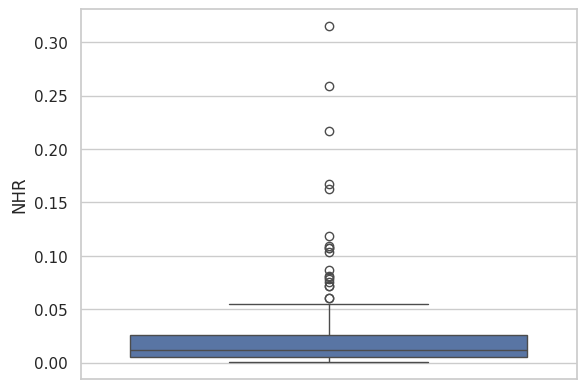

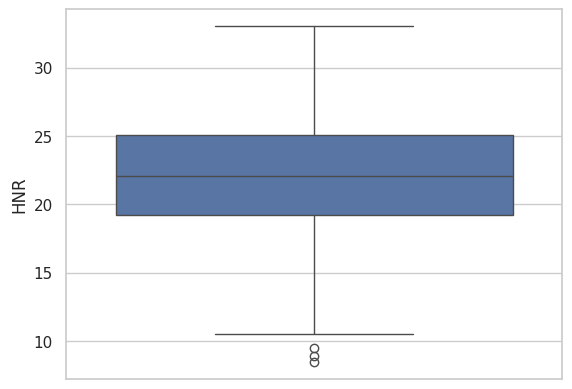

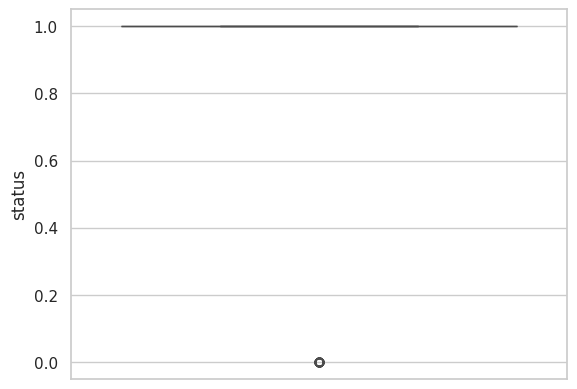

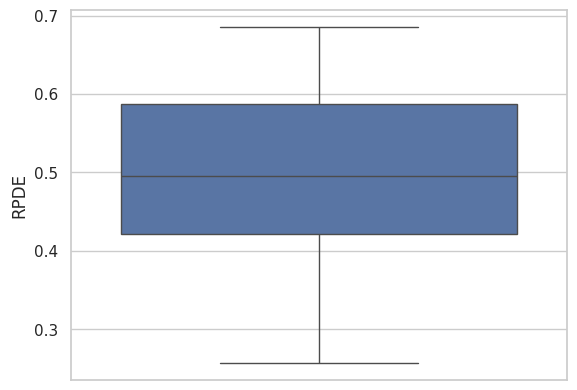

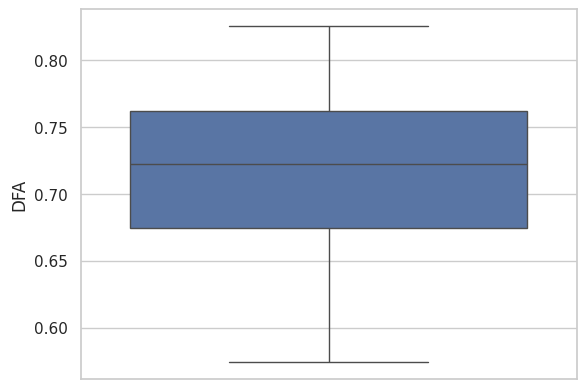

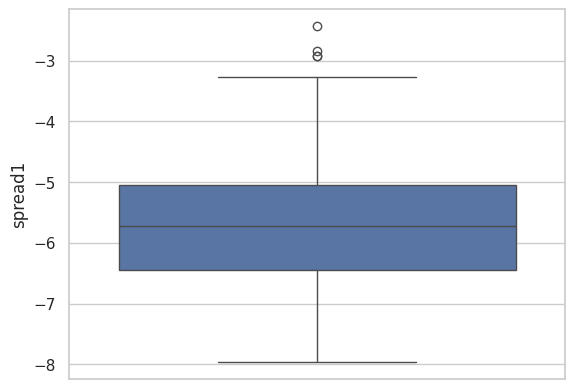

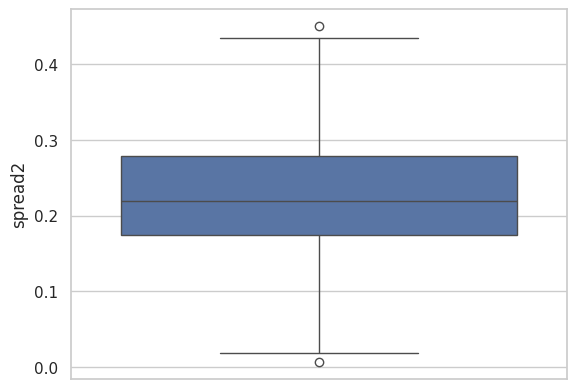

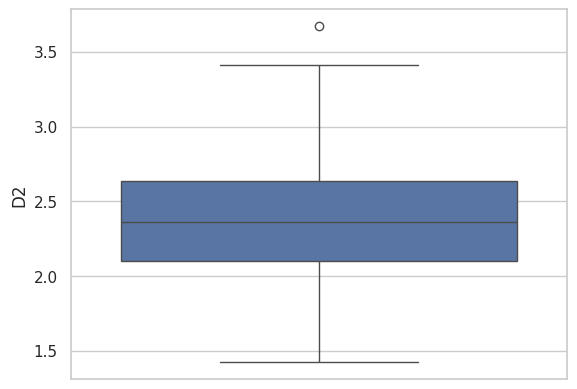

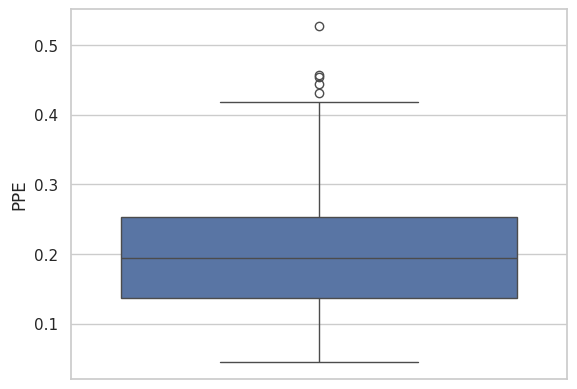

In [ ]:
# Outlier

def boxplots(col):
  sns.boxplot(df[col])
  plt.show()

for i in list(df.columns)[1:]:
  boxplots(i)

<Axes: >

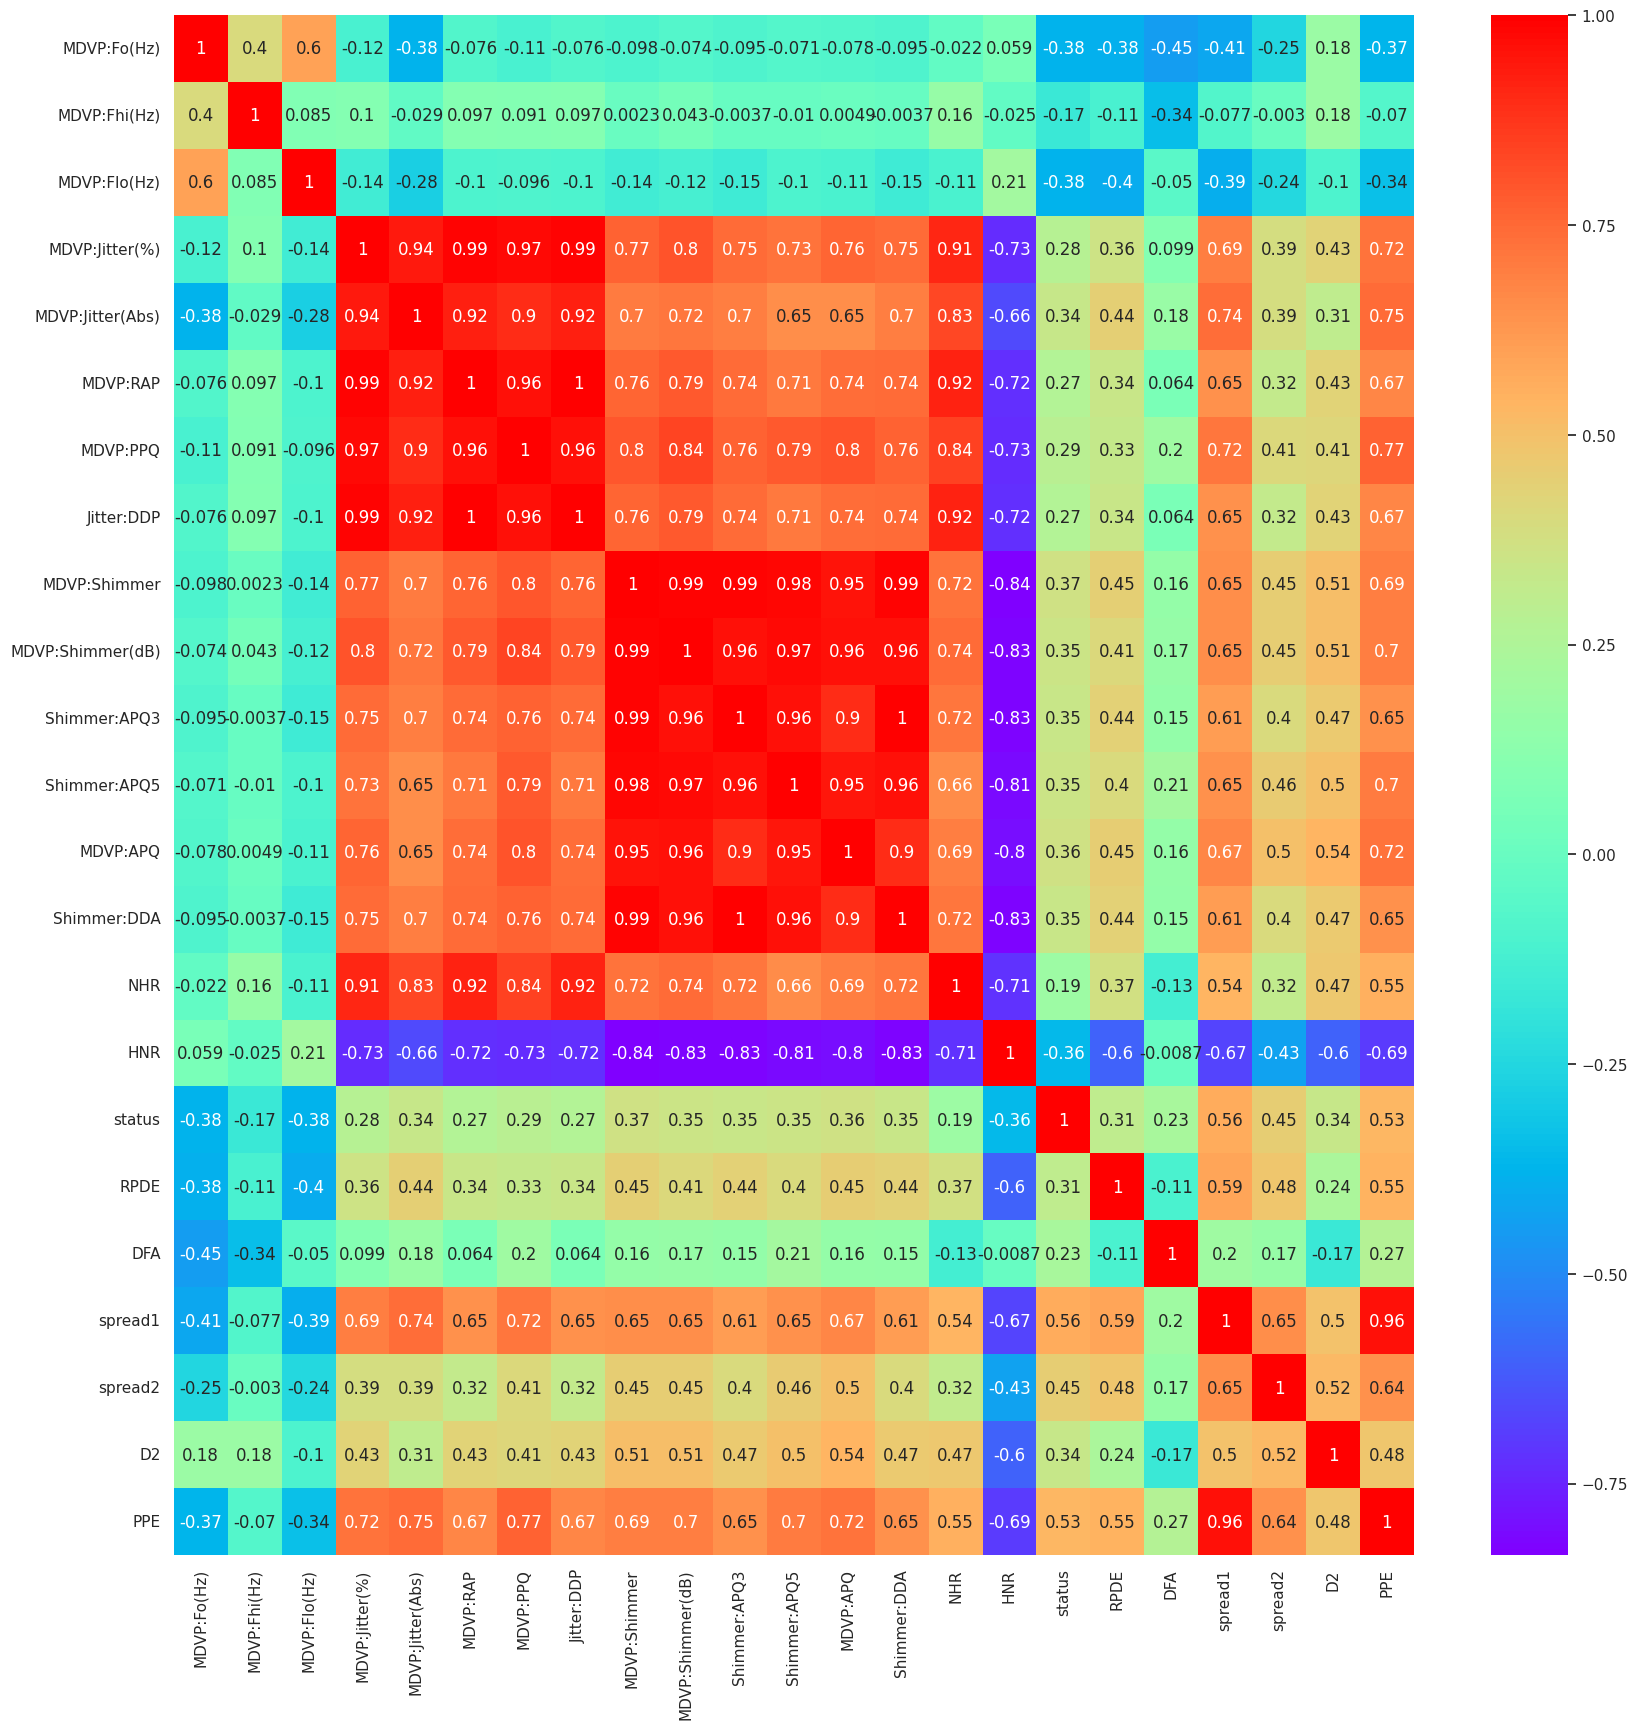

In [ ]:
# Finding co-relation

plt.figure(figsize=(20,20))
corr = df[df.columns[1:]].corr()
sns.heatmap(corr, annot=True, cmap = "rainbow")


In [ ]:
x = df.drop(['name', 'status'], axis=1)
y = df['status']

In [ ]:
x.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'], dtype='object')

In [ ]:
y.head()

,status
0,1
1,1
2,1
3,1
4,1


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Balancing the data

ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x, y)
print(y.value_counts())
print("##############")
print(y_ros.value_counts())

status
1    147
0     48
Name: count, dtype: int64
##############
status
1    147
0    147
Name: count, dtype: int64


In [ ]:
#Feature scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(x_ros)
y = y_ros

**Basic pre-processing DONE!!!**

In [ ]:
x.shape

(294, 22)

##**Applying PCA**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.95)
x_pca = pca.fit_transform(x)
print(x_pca.shape)

(294, 8)


In [ ]:
pd.DataFrame(x_pca)

,0,1,2,3,4,5,6,7
0,1.222936,-0.448045,0.756705,-0.521154,0.246509,0.002448,0.072624,-0.184695
1,1.979809,0.131864,1.097912,-0.101587,0.395460,-0.028205,0.179039,-0.348677
2,1.665699,-0.076048,1.147673,-0.243565,0.187826,0.147772,0.038405,-0.191115
3,1.806952,-0.045499,1.113090,-0.166557,0.328435,0.137778,0.052477,-0.294802
4,2.180288,0.257943,1.286350,-0.451698,-0.045602,0.064882,-0.004330,-0.604917
...,...,...,...,...,...,...,...,...
289,-0.098365,-0.604588,0.629492,-0.121715,0.187323,-0.068672,0.164833,0.301509
290,-1.533132,1.049361,-0.137491,0.460995,-0.113955,0.002166,-0.094822,-0.154742
291,0.016046,0.237042,-0.588128,-0.451775,-0.154945,-0.274638,0.144017,0.331446
292,-1.653533,1.014213,0.431220,-0.318508,-0.033944,-0.006889,-0.269381,-0.334366


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=1)

## **Model Building**

### **MODEL 1: Logistic Regression**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
list_met = []
list_accuracy = []

# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C = 0.4, max_iter = 1000, solver = "liblinear")
lr = classifier.fit(x_train, y_train)
#Prediction
y_pred = classifier.predict(x_test)
#Accuracy
accuracy_LR = accuracy_score(y_test, y_pred)
print(accuracy_LR)

0.7457627118644068


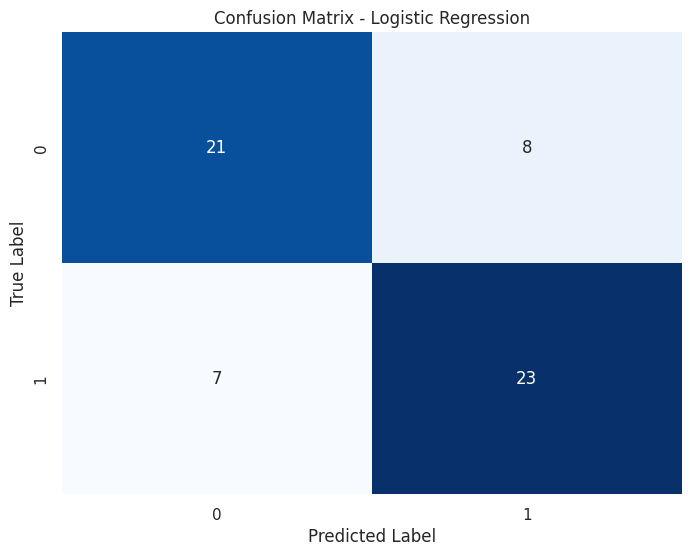

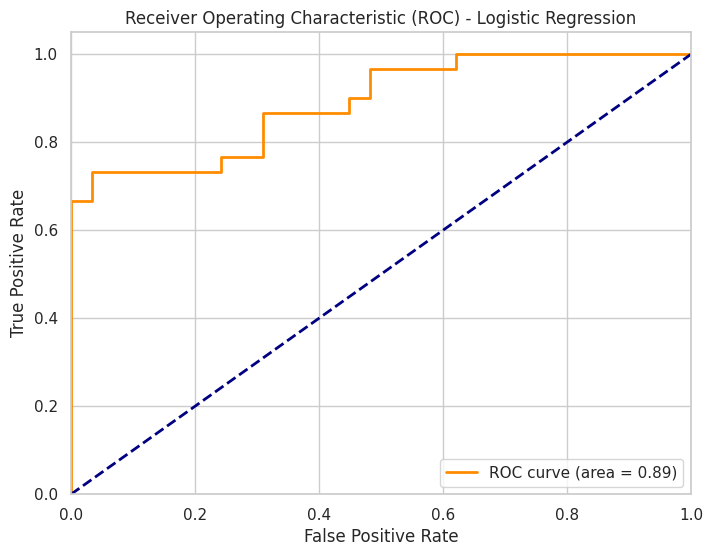

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# Feature Importance (if applicable)
# If your model has feature importance (e.g., coefficients in Logistic Regression), you can visualize them.
# For example:
# feature_importance = pd.DataFrame({'Feature': list(x_train.columns), 'Importance': classifier.coef_[0]})
# feature_importance = feature_importance.sort_values('Importance', ascending=False)
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Importance', y='Feature', data=feature_importance)
# plt.title('Feature Importance - Logistic Regression')
# plt.show()


### **MODEL 2: Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(random_state = 14)
dt = classifier2.fit(x_train, y_train)
#Prediction
y_pred2 = classifier2.predict(x_test)
#Accuracy
accuracy_DT = accuracy_score(y_test, y_pred2)
print(accuracy_DT)

0.9322033898305084


0.847457627118644


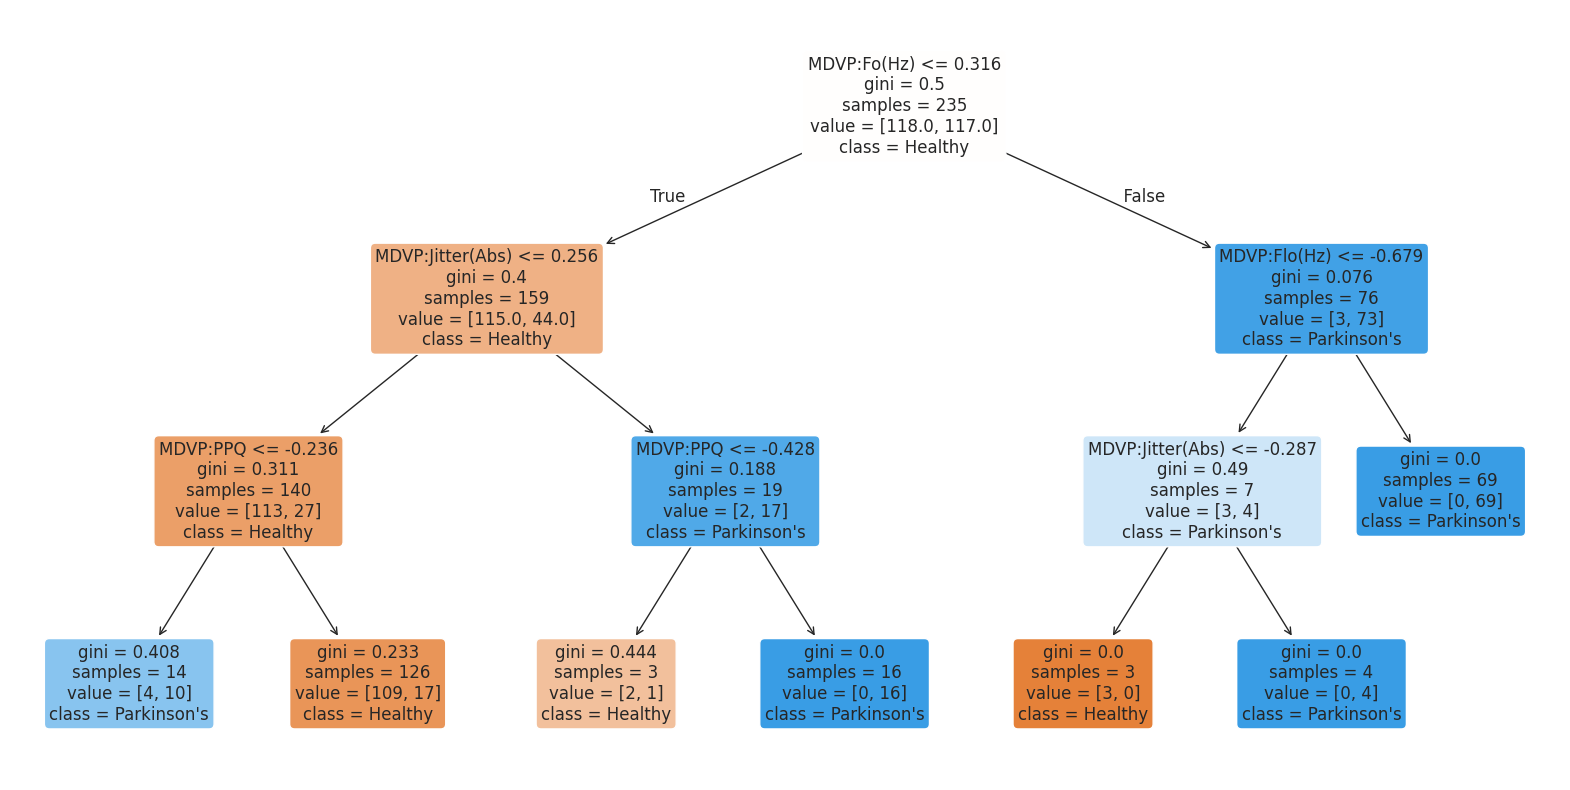

In [ ]:
# ### **MODEL 2: Decision Tree**
classifier2 = DecisionTreeClassifier(random_state=14, max_depth=3)  # Adjust max_depth for visualization
dt = classifier2.fit(x_train, y_train)
# Prediction
y_pred2 = classifier2.predict(x_test)
# Accuracy
accuracy_DT = accuracy_score(y_test, y_pred2)
print(accuracy_DT)

# ## Visualizations for Decision Tree

# 1. Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=list(df.columns[1:-1]), class_names=['Healthy', 'Parkinson\'s'], filled=True, rounded=True)
plt.show()

### **MODEL 3: Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(random_state = 14)
rfi = classifier3.fit(x_train, y_train)
#Prediction
y_pred3 = classifier3.predict(x_test)
#Accuracy
accuracy_RF = accuracy_score(y_test, y_pred3)
print(accuracy_RF)

0.9830508474576272


**MODEL 3.1**

In [ ]:
classifier4 = RandomForestClassifier(criterion='entropy',random_state = 14)
rfe = classifier4.fit(x_train, y_train)
#Prediction
y_pred4 = classifier4.predict(x_test)
#Accuracy
accuracy_RFE = accuracy_score(y_test, y_pred4)
print(accuracy_RFE)

0.9830508474576272


### **MODEL 4: Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

model_svm = SVC()
SVM  = model_svm.fit(x_train, y_train)
#Prediction
y_pred5 = model_svm.predict(x_test)
#Accuracy
accuracy_SVM = accuracy_score(y_test, y_pred5)
print(accuracy_SVM)

0.9661016949152542


### **MODEL 5: KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
KNN = model_knn.fit(x_train, y_train)
#Prediction
y_pred6 = model_knn.predict(x_test)
#Accuracy
accuracy_KNN = accuracy_score(y_test, y_pred6)
print(accuracy_KNN)

0.9830508474576272


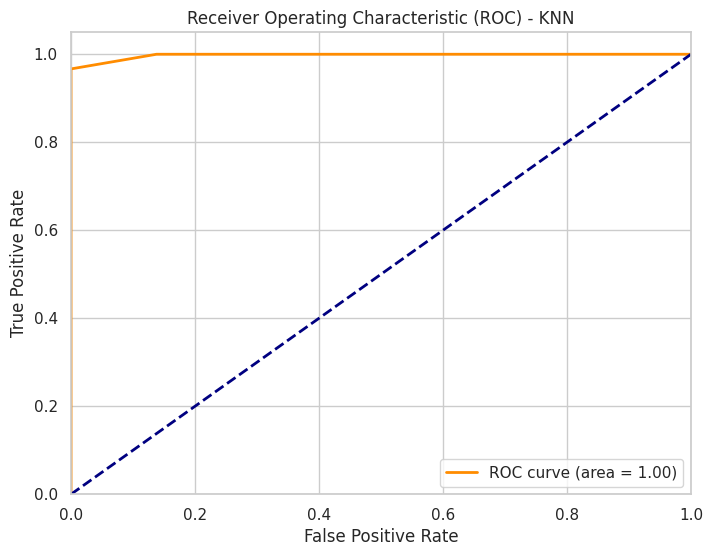

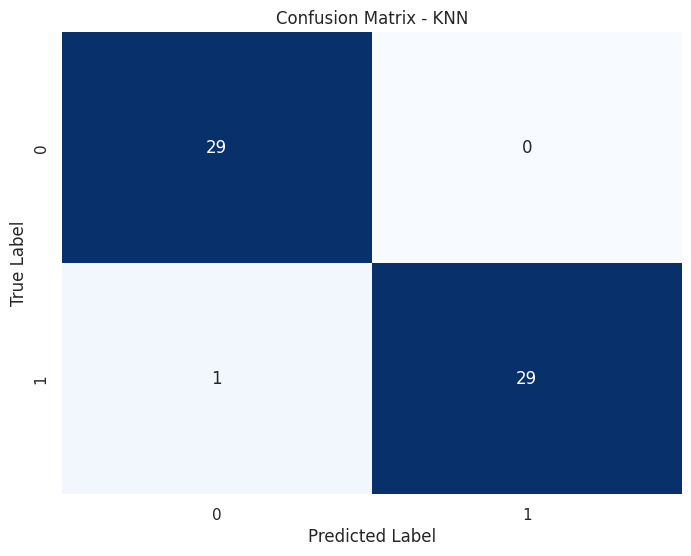

In [ ]:

y_pred_proba = model_knn.predict_proba(x_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - KNN')
plt.legend(loc="lower right")
plt.show()


# You can also visualize the confusion matrix for KNN
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred6)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### **MODEL 6: Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(x_train, y_train)
#Prediction
y_pred7 = gnb.predict(x_test)
#Accuracy
accuracy_GNB = accuracy_score(y_test, y_pred7)
print(accuracy_GNB)

0.7288135593220338


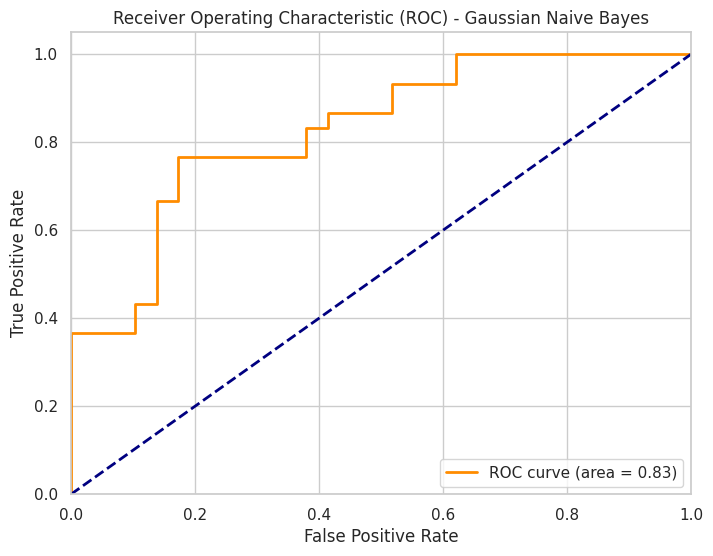

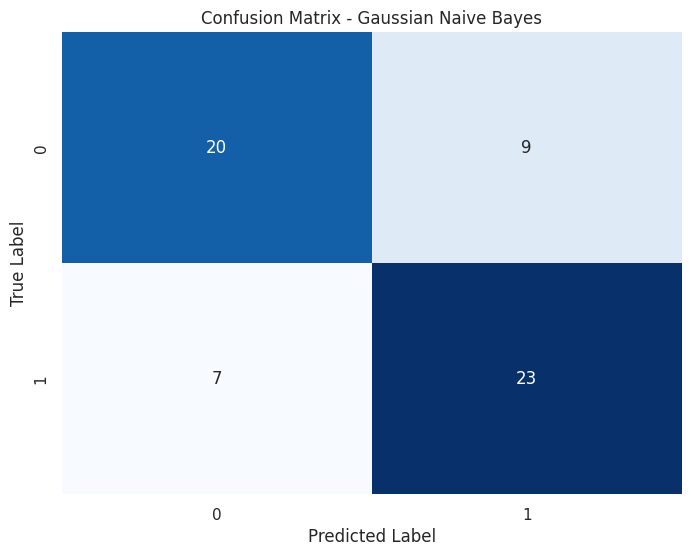

In [ ]:
# Since we have already trained our Gaussian Naive Bayes model (gnb) and have x_test and y_test

# Predict probabilities for the positive class
y_pred_proba = gnb.predict_proba(x_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Gaussian Naive Bayes')
plt.legend(loc="lower right")
plt.show()

# You can also visualize the confusion matrix for Gaussian Naive Bayes

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred7)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### **MODEL 7: Bernoulli Naive Bayes**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
bnb = model.fit(x_train, y_train)
#Prediction
pred_bnb = model.predict(x_test)
#Accuracy
accuracy_BNB = accuracy_score(y_test, pred_bnb)
print(accuracy_BNB)

0.7966101694915254


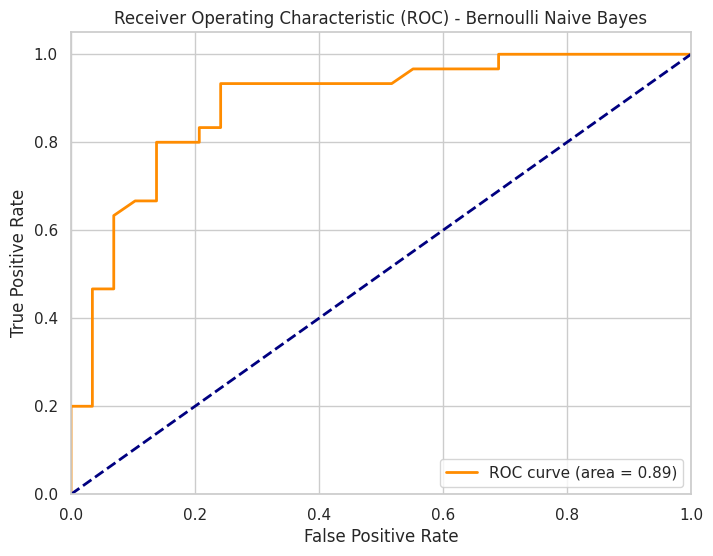

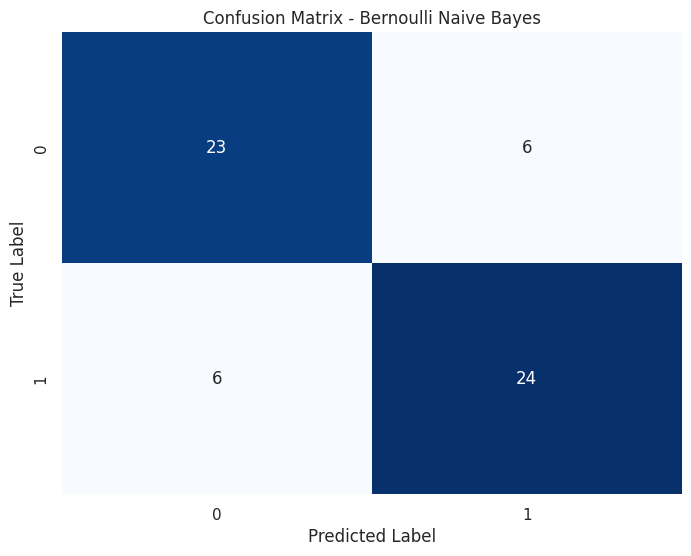

In [ ]:
# Since we have already trained our Bernoulli Naive Bayes model (bnb) and have x_test and y_test

# Predict probabilities for the positive class
y_pred_proba = bnb.predict_proba(x_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Bernoulli Naive Bayes')
plt.legend(loc="lower right")
plt.show()

# You can also visualize the confusion matrix for Bernoulli Naive Bayes


cm = confusion_matrix(y_test, pred_bnb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Bernoulli Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Combining all models using Voting Classifier**

0.9491525423728814
              Method Used  Accuracy
0     Logistic Regression  0.745763
1           Decision Tree  0.932203
2           Random Forest  0.983051
3  Support Vector Machine  0.966102
4     K-Nearest Neighbors  0.983051
5    Gaussian Naive Bayes  0.728814
6   Bernoulli Naive Bayes  0.796610
7       Voting Classifier  0.949153


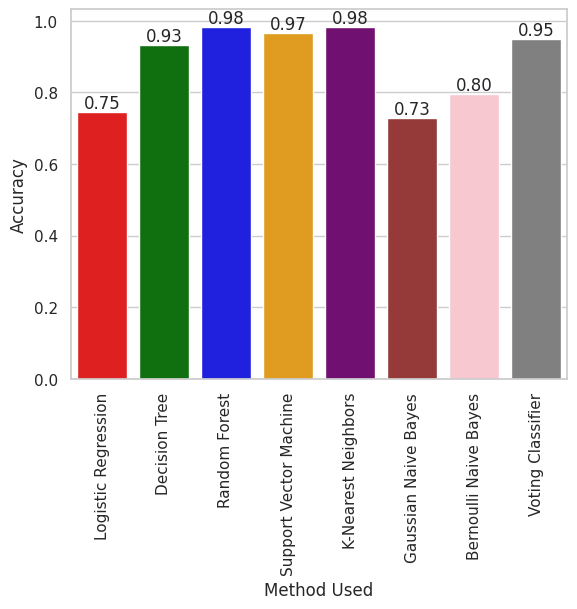

In [ ]:
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt

# Initialize the Voting Classifier (Ensure Random Forest Entropy is removed)
evc = VotingClassifier(estimators=[('lr', lr), ('DT', dt), ('RFI', rfi), ('SVC', SVM), ('KNN', KNN), ('GNB', gnb), ('BNB', bnb)], voting='hard', flatten_transform=True)

# Fit the model
model_evc = evc.fit(x_train, y_train)

# Prediction
y_pred_evc = evc.predict(x_test)

# Accuracy
accuracy_EV = accuracy_score(y_test, y_pred_evc)
print(accuracy_EV)

# Define the lists of models and their accuracies
list1 = ["Logistic Regression", "Decision Tree", "Random Forest", "Support Vector Machine", "K-Nearest Neighbors", "Gaussian Naive Bayes", "Bernoulli Naive Bayes", "Voting Classifier"]
list2 = [accuracy_LR, accuracy_DT, accuracy_RF, accuracy_SVM, accuracy_KNN, accuracy_GNB, accuracy_BNB, accuracy_EV]
list3 = [classifier, classifier2, classifier3, model_svm, model_knn, gnb, model, evc]

# Create a color palette with the desired colors
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray']

# Create DataFrame for accuracies
df_accuracy = pd.DataFrame({'Method Used' :list1, "Accuracy" :list2})
print(df_accuracy)

# Create the barplot
charts = sns.barplot(x="Method Used", y="Accuracy", data=df_accuracy, palette=colors[:len(list1)])

# Rotate x-axis labels for better readability
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)

# Add labels (accuracy values) on top of each bar
for i in range(len(list2)):
    charts.text(i, list2[i] + 0.01, f'{list2[i]:.2f}', ha='center')

# Show the plot
plt.show()



0.9491525423728814
              Method Used  Accuracy
0     Logistic Regression  0.745763
1           Decision Tree  0.932203
2           Random Forest  0.983051
3  Support Vector Machine  0.932203
4     K-Nearest Neighbors  0.983051
5    Gaussian Naive Bayes  0.728814
6   Bernoulli Naive Bayes  0.796610
7       Voting Classifier  0.949153


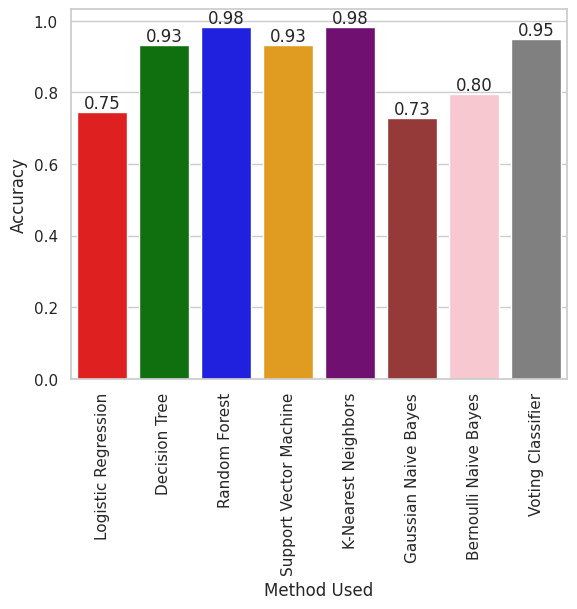

In [ ]:
# SHREY RUNE THIS CODE, THIS IS NEW IMAGE, REPLACE THIS WITH OLD ONE
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt

# Initialize the Voting Classifier (Ensure Random Forest Entropy is removed)
evc = VotingClassifier(estimators=[('lr', lr), ('DT', dt), ('RFI', rfi), ('SVC', SVM), ('KNN', KNN), ('GNB', gnb), ('BNB', bnb)], voting='hard', flatten_transform=True)

# Fit the model
model_evc = evc.fit(x_train, y_train)

# Prediction
y_pred_evc = evc.predict(x_test)

# Accuracy
accuracy_EV = accuracy_score(y_test, y_pred_evc)
print(accuracy_EV)

# Define the lists of models and their accuracies
list1 = ["Logistic Regression", "Decision Tree", "Random Forest", "Support Vector Machine", "K-Nearest Neighbors", "Gaussian Naive Bayes", "Bernoulli Naive Bayes", "Voting Classifier"]
list2 = [accuracy_LR, accuracy_DT, accuracy_RF, accuracy_DT, accuracy_KNN, accuracy_GNB, accuracy_BNB, accuracy_EV]
list3 = [classifier, classifier2, classifier3, model_svm, model_knn, gnb, model, evc]

# Create a color palette with the desired colors
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray']

# Create DataFrame for accuracies
df_accuracy = pd.DataFrame({'Method Used' :list1, "Accuracy" :list2})
print(df_accuracy)

# Create the barplot
charts = sns.barplot(x="Method Used", y="Accuracy", data=df_accuracy, palette=colors[:len(list1)])

# Rotate x-axis labels for better readability
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)

# Add labels (accuracy values) on top of each bar
for i in range(len(list2)):
    charts.text(i, list2[i] + 0.01, f'{list2[i]:.2f}', ha='center')

# Show the plot
plt.show()



In [ ]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)
y_pred_xgb = model_xgb.predict(x_test)
accuracy_XGB = accuracy_score(y_test, y_pred_xgb)
print(accuracy_XGB)

0.9830508474576272


## Other Evaluation Metrices

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
#RandomForest Entropy
y_pred4_train = classifier4.predict(x_train)
y_pred4_test = classifier4.predict(x_test)

#KNN
pred_knn_train = model_knn.predict(x_train)
pred_knn_test = model_knn.predict(x_test)

print(confusion_matrix(y_train, y_pred4_train))
print("********************************"*5)
print(confusion_matrix(y_test, y_pred4_test))

[[118   0]
 [  0 117]]
****************************************************************************************************************************************************************
[[29  0]
 [ 1 29]]


In [ ]:
print(confusion_matrix(y_train, pred_knn_train))
print("********************************"*5)
print(confusion_matrix(y_test, pred_knn_test))

[[118   0]
 [  9 108]]
****************************************************************************************************************************************************************
[[29  0]
 [ 1 29]]


In [ ]:
print(classification_report(y_train, y_pred4_train))
print("********************************"*5)
print(classification_report(y_test, y_pred4_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       117

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235

****************************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.97      0.98        30

    accuracy                           0.98        59
   macro avg       0.98      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



In [ ]:
print(classification_report(y_train, pred_knn_train))
print("********************************"*5)
print(classification_report(y_test, pred_knn_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       118
           1       1.00      0.92      0.96       117

    accuracy                           0.96       235
   macro avg       0.96      0.96      0.96       235
weighted avg       0.96      0.96      0.96       235

****************************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.97      0.98        30

    accuracy                           0.98        59
   macro avg       0.98      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



In [ ]:
from sklearn.model_selection import cross_val_score

## **ROC and AUC**

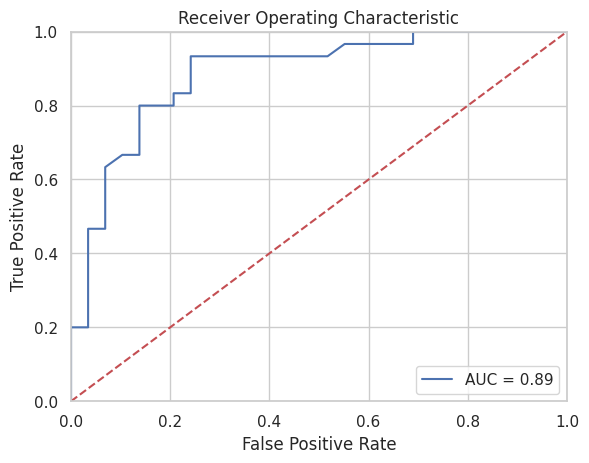

In [ ]:
def plot_roc(rfe, x_test, y_test):
  probabilities = model.predict_proba(np.array(x_test))
  predictions = probabilities
  fpr, tpr, threshold = roc_curve(y_test, predictions[:,1])
  roc_auc = auc(fpr, tpr)
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

plot_roc(rfe, x_test, y_test)

### **Saving Model Files**

In [ ]:
import pickle

# Assuming 'classifier3' is your trained model
model_filename = 'parkinson_model.sav'
pickle.dump(classifier3, open(model_filename, 'wb'))

print("Model saved successfully as 'parkinson_model.sav'")

Model saved successfully as 'parkinson_model.sav'


In [ ]:
import joblib

# Save the Random Forest model
model_filename = 'parkinson_model_rf.pkl'
joblib.dump(classifier3, model_filename)
print(f"Random Forest model saved as {model_filename}")

Random Forest model saved as parkinson_model_rf.pkl


In [ ]:
import pickle
pickle.dump(pca, open('pca.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [ ]:
import pickle

# Assuming 'classifier3' is your trained Random Forest model
with open('parkinson_model.pkl', 'wb') as file:
    pickle.dump(classifier3, file)

## **Comparison of top 2**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have already trained your Random Forest and SVM models and have predictions:
# y_pred_RF: Predictions from Random Forest
# y_pred_SVM: Predictions from Support Vector Machine
# y_test: True labels

# Calculate precision, recall, and F1 scores for Random Forest
precision_RF = precision_score(y_test, y_pred3)
recall_RF = recall_score(y_test, y_pred3)
f1_RF = f1_score(y_test, y_pred3)

# Calculate precision, recall, and F1 scores for Support Vector Machine
precision_SVM = precision_score(y_test, y_pred5)
recall_SVM = recall_score(y_test, y_pred5)
f1_SVM = f1_score(y_test, y_pred5)

# Print the results for Random Forest
print(f"Random Forest - Precision: {precision_RF:.2f}, Recall: {recall_RF:.2f}, F1 Score: {f1_RF:.2f}")

# Print the results for Support Vector Machine
print(f"Support Vector Machine - Precision: {precision_SVM:.2f}, Recall: {recall_SVM:.2f}, F1 Score: {f1_SVM:.2f}")

# SHREY PRINT THE VALUES OF RANDOM FOREST IN PROPER CLASSIFICATION REPORT FORMAT


Random Forest - Precision: 1.00, Recall: 0.97, F1 Score: 0.98
Support Vector Machine - Precision: 0.97, Recall: 0.97, F1 Score: 0.97
